In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-dataset/Walmart.csv
/kaggle/input/walmart-sales-data/output_file.csv


In [2]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import pickle


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'/kaggle/input/walmart-dataset/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**1. DATA EXPLORATION**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [9]:
df.shape

(6435, 10)

In [10]:
df12= df.copy()

2. **Exploratory Data Analysis**

In [11]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


<AxesSubplot:>

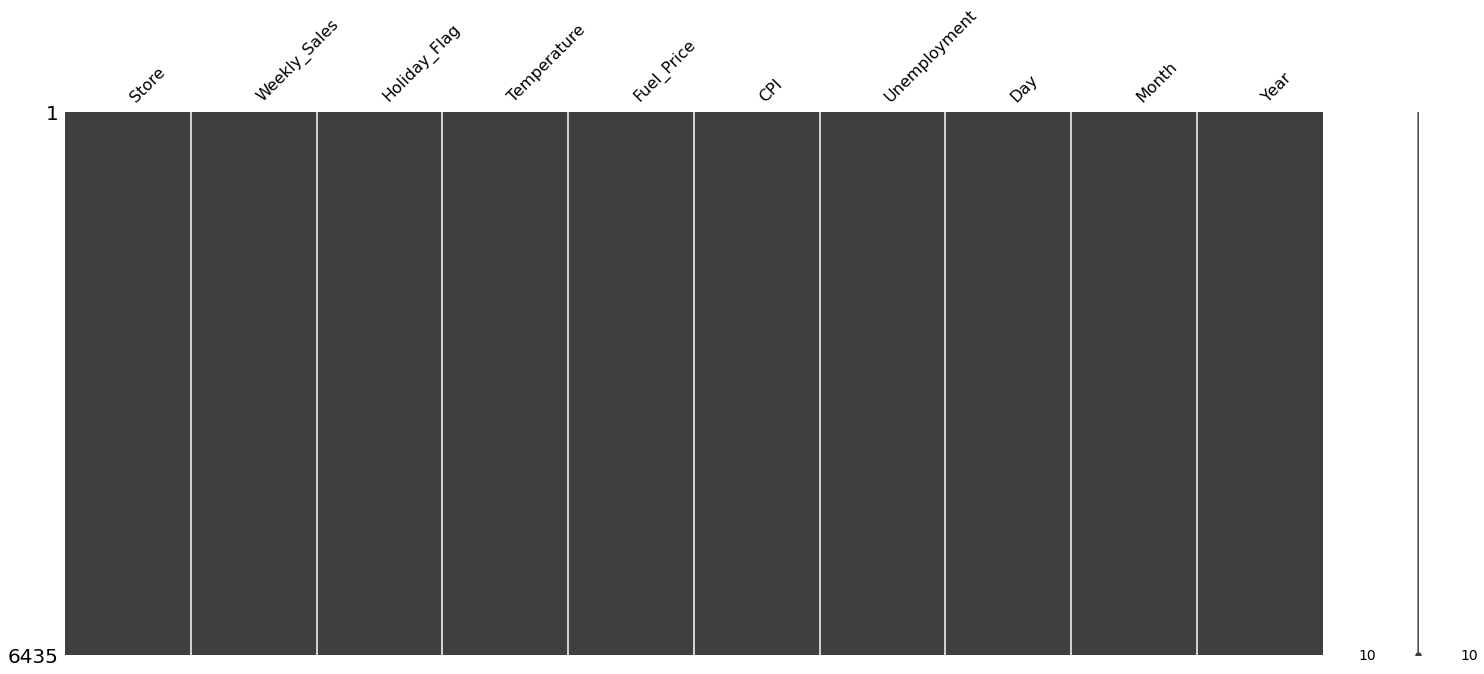

In [12]:
#visualization of data 
import missingno as msgn
msgn.matrix(df)

This function then generates a matrix plot visualizing the missing data in the DataFrame.

Using such visualizations can help in identifying missing data patterns, making decisions about handling missing values, and gaining insights into the overall data quality.

In [13]:
# converting days and months from numerics to categories
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['Day'] = df['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df['Month']= df['Month'].map(months)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010


In [14]:
for i in ['Store','Fuel_Price','Unemployment','Day','Month','Year']:
    print(f'{i}: {df[i].nunique()}')

Store: 45
Fuel_Price: 892
Unemployment: 349
Day: 7
Month: 12
Year: 3


<AxesSubplot:xlabel='Year', ylabel='count'>

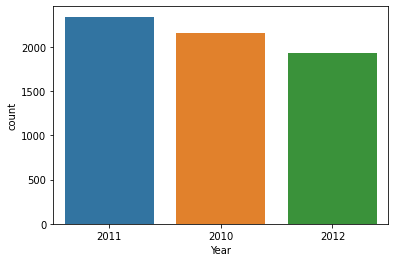

In [15]:
sns.countplot(df['Year'],order=df['Year'].value_counts().index)

Using the countplot function, to create a bar plot that shows the counts of unique values in the 'Year' column of the DataFrame (df).

<AxesSubplot:xlabel='Day', ylabel='count'>

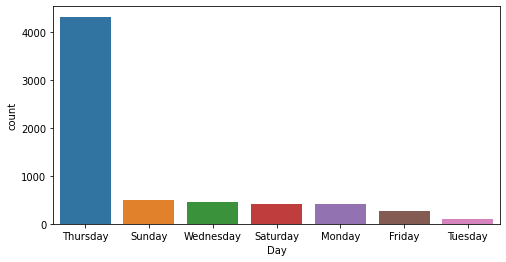

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(df['Day'],order=df['Day'].value_counts().index)

This code generates a bar plot that visualizes the distribution of days in the 'Day' column of the DataFrame, ordered by the frequency of each day in descending order.

<AxesSubplot:xlabel='Month', ylabel='count'>

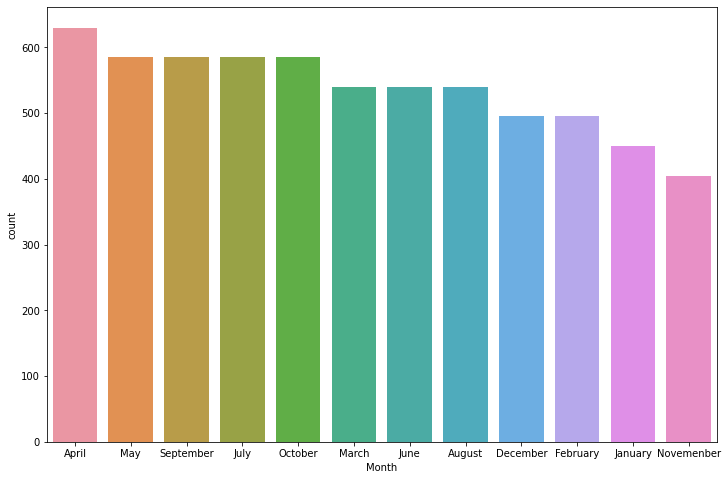

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(df['Month'],order= df['Month'].value_counts().index)

This code generates a bar plot that visualizes the distribution of months in the 'Month' column of the DataFrame, ordered by the frequency of each month in descending order. This type of plot is useful for understanding the distribution of data across different months in a categorical variable.

In [18]:
df.groupby('Year')['Weekly_Sales'].sum()

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

2011 has highest total weekly sales based on data. Thats because the database has more number of records of 2011. 

Text(0.5, 1.0, 'Annual Sales')

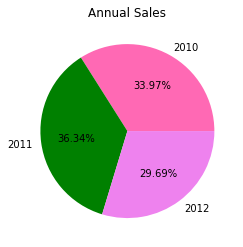

In [19]:
plt.pie(df.groupby('Year')['Weekly_Sales'].sum(),labels=df['Year'].unique(),normalize=True,autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')

This code creates a pie chart representing the distribution of annual sales for each unique year in the 'Year' column of the DataFrame, with percentages displayed on each wedge and custom colors. The title of the pie chart is set to 'Annual Sales'.

In [20]:
df2 = df.groupby('Day')['Weekly_Sales'].sum().reset_index()
df2.head(10)

,Day,Weekly_Sales
0,Friday,2.824947e+08
1,Monday,4.335075e+08
2,Saturday,4.266091e+08
3,Sunday,5.390133e+08
4,Thursday,4.486257e+09
5,Tuesday,9.271282e+07
6,Wednesday,4.766244e+08


Aggregating the data based on a specific column 'Day' and calculating some summary statistic (in this case, the sum of 'Weekly_Sales') for each group.

([<matplotlib.patches.Wedge at 0x79e8913b0710>,
 [Text(1.0904699850328354, 0.14448256553123598, 'Friday'),
  Text(0.9829060316235633, 0.4938580089438856, 'Monday'),
  Text(0.7120974620854462, 0.8384015771045916, 'Saturday'),
  Text(0.2762389849519859, 1.0647497467446032, 'Sunday'),
  Text(-0.9553304829562036, -0.5452922778975208, 'Thursday'),
  Text(0.9717354970821146, -0.5154901780932163, 'Tuesday'),
  Text(1.0729438350515599, -0.24246964103749427, 'Wednesday')],
 [Text(0.5948018100179102, 0.0788086721079469, '4.19%'),
  Text(0.5361305627037617, 0.2693770957875739, '6.43%'),
  Text(0.3884167975011525, 0.457309951147959, '6.33%'),
  Text(0.15067580997381047, 0.5807725891334199, '8.00%'),
  Text(-0.5210893543397473, -0.2974321515804658, '66.59%'),
  Text(0.5300375438629715, -0.2811764607781179, '1.38%'),
  Text(0.5852420918463053, -0.13225616783863323, '7.07%')])

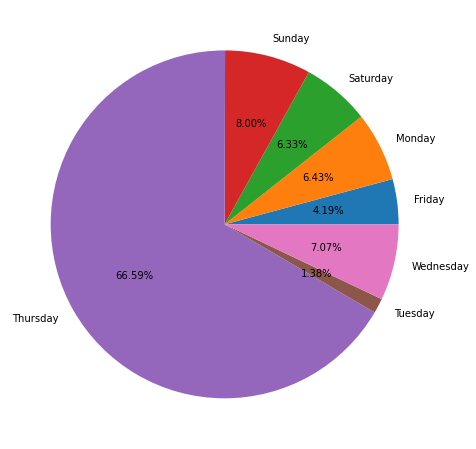

In [21]:
plt.figure(figsize=(10,8))
plt.pie(df2['Weekly_Sales'],labels= df2['Day'],autopct='%1.2f%%', normalize=True)

Pie chart to visualize the proportion of total sales for each unique day in the 'Day' column of the DataFrame df2. The percentages are displayed on each wedge with two decimal places, and the values are normalized to represent proportions.

Thursday had the highest total sales compared to the other days of the week.

In [22]:
df3 = df.groupby('Month')['Weekly_Sales'].sum().reset_index()

df3.head()

,Month,Weekly_Sales
0,April,6.453239e+08
1,August,5.642317e+08
2,December,5.990761e+08
3,February,5.220257e+08
4,January,4.264263e+08


This cell represent total weekly sales grouping by the 'Month' column.

([<matplotlib.patches.Wedge at 0x79e89132d850>,
 [Text(1.0505715420703448, 0.3260359412579202, 'April'),
  Text(0.7135560893168025, 0.8371605027704733, 'August'),
  Text(0.17894470808660848, 1.0853473137423792, 'December'),
  Text(-0.38685422481986037, 1.0297299688457286, 'February'),
  Text(-0.7903461501230193, 0.7650836313670042, 'January'),
  Text(-1.0529134511925988, 0.3183916837759601, 'July'),
  Text(-1.0654902855032773, -0.27336870980078276, 'June'),
  Text(-0.7840328017971336, -0.7715520499008066, 'March'),
  Text(-0.2752227535923998, -1.0650128806286887, 'May'),
  Text(0.26538381737518074, -1.0675071098008562, 'Novemenber'),
  Text(0.7408373645676252, -0.8131174572351131, 'October'),
  Text(1.0585579767623141, -0.29909030380952856, 'September')],
 [Text(0.5730390229474608, 0.1778377861406837, '9.58%'),
  Text(0.3892124123546195, 0.4566330015111672, '8.37%'),
  Text(0.09760620441087733, 0.5920076256776613, '8.89%'),
  Text(-0.21101139535628746, 0.5616708920976701, '7.75%'),
  T

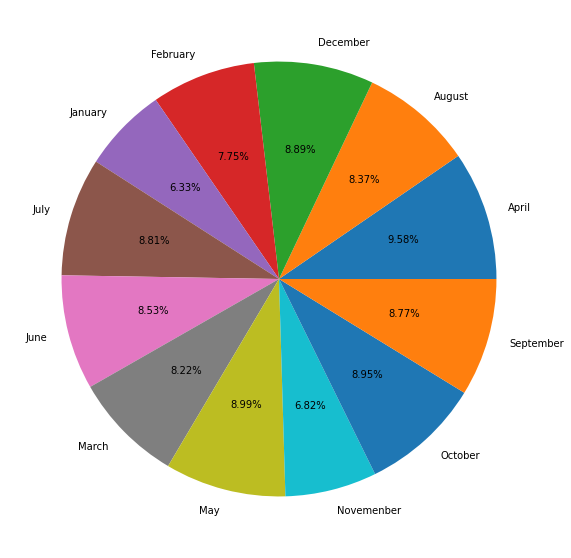

In [23]:
plt.figure(figsize=(10,10))
plt.pie(df3['Weekly_Sales'],labels=df3['Month'],normalize=True,autopct='%1.2f%%')

April had the highest total sales compared to the other months of the year.

([<matplotlib.patches.Wedge at 0x79e8912529d0>,
 [Text(-0.25679386593526243, -1.0696059603508306, 'Non Special Holiday Week'),
  Text(0.3268284610531304, 1.361316699760068, 'Special Holiday Week')],
 [Text(-0.14006938141923403, -0.5834214329186348, '92.50%'),
  Text(0.2101040106770124, 0.8751321641314721, '7.50%')])

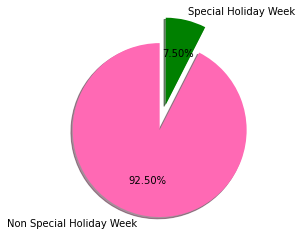

In [24]:
df4 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(df4['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],normalize=True,autopct='%1.2f%%',startangle=90,explode=[0,0.3],shadow=True,colors=['hotpink','green'])

The code represent pie chart representing the distribution of total sales for special and non-special holiday weeks. The 'Special Holiday Week' wedge is exploded (moved outward) for emphasis, and the chart includes a shadow effect for better visualization.

In [25]:
df.groupby('Store')['Weekly_Sales'].count().reset_index()

,Store,Weekly_Sales
0,1,143
1,2,143
2,3,143
3,4,143
4,5,143
5,6,143
6,7,143
7,8,143
8,9,143
9,10,143


In [26]:
#aggregate sales data based on the 'Store' column, calculating the total weekly sales for each unique store.
df.groupby('Store')['Weekly_Sales'].sum().reset_index()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [27]:
# maximum total weekly sales among all the stores
df.groupby('Store')['Weekly_Sales'].sum().max()

301397792.46

#### **Observation:**
* 2011 has recorded highest number of sales then followed by 2010 and 2012.
* More than 50% of sales happen on Thursday.
* Highest sales are recorded in April then followed by May, October, December ,September although their is little variance.
* Most sales comes on non special holiday week which makes sense people may not want to spend their special grocery shopping they would probably shop before to celebrate their special holiday. Like for Christmas week, people go for shopping on weeks before. 
* All stores have equal number of sales yet store 20 has recorded highest sales.

# Distributions


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

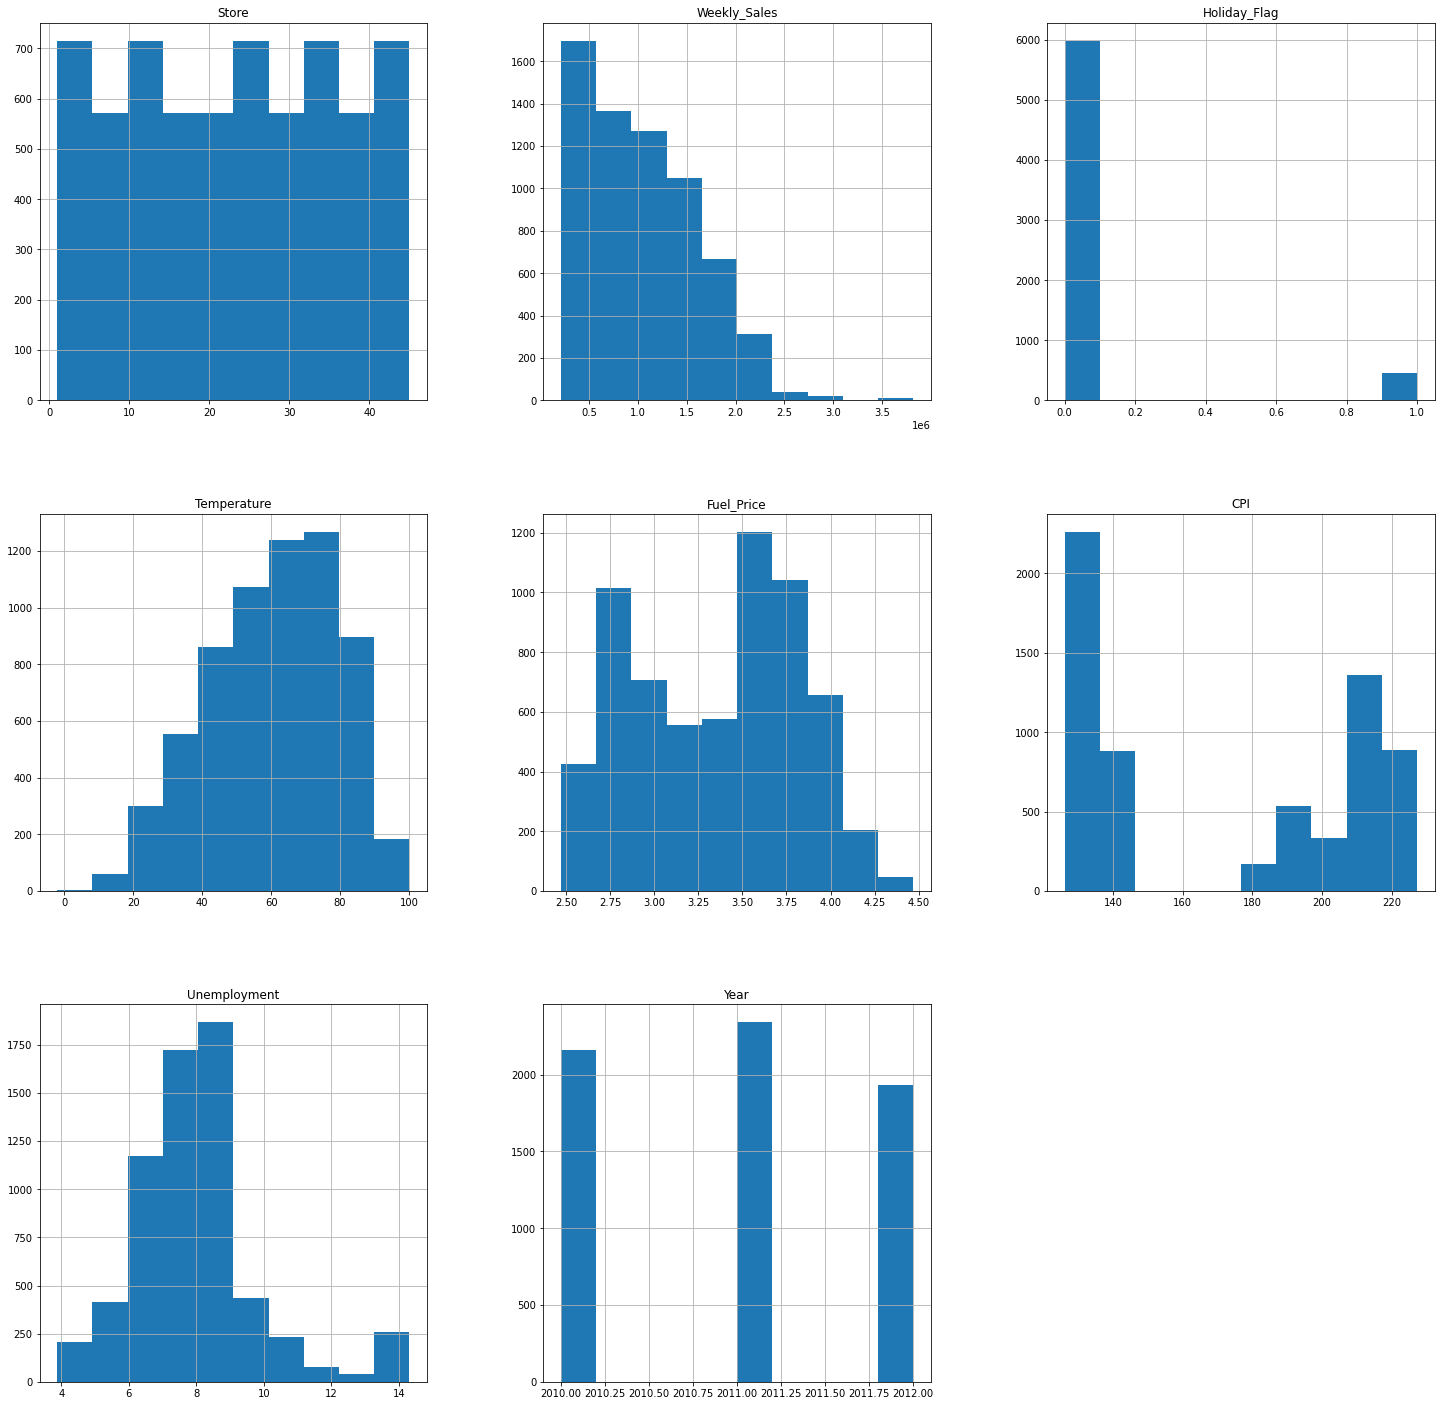

In [28]:
# creating a histogram for each numerical column
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
df.hist(ax=ax)
plt.tight_layout

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

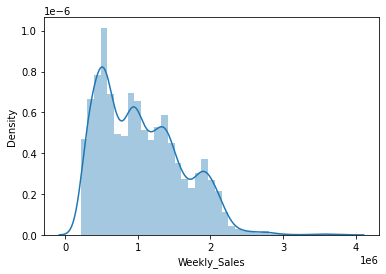

In [29]:
# create a distribution plot (histogram) for the 'Weekly_Sales' column
sns.distplot(df['Weekly_Sales'],kde=True)

The resulting plot will show a histogram of the distribution of weekly sales values, and the KDE plot provides a smoothed curve that estimates the underlying probability density.

The figure shows the right skewed data for the 'weekly sales' column. 

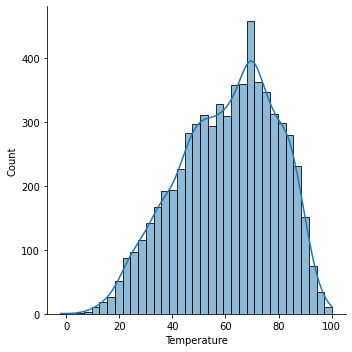

In [30]:
sns.displot(df['Temperature'],kde=True)

<AxesSubplot:xlabel='Temperature'>

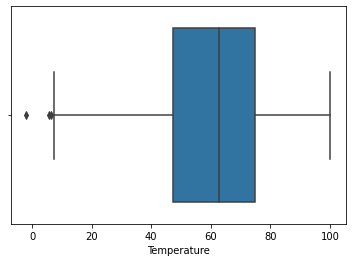

In [31]:
sns.boxplot(df['Temperature'])

The above boxplot will provide a visual summary of the central tendency, spread, and presence of outliers in the 'Temperature' data.

+ The line inside the box is median
+ the box border is Interquartile range (Q1 and Q3)
+ The whiskers to the left is minimum value
+ The whiskers to the right is maximum value
+ The dotted mark outside the boxplot is outlier

Most of the data falls in the range of 40 - 80 F.

In [32]:
plt.figure(figsize = (20,5))
fig = px.scatter(df, x="Weekly_Sales", y="Temperature", color="Store",
                 title="Relation between Temperature and weeklysales within stores")

fig.show()

<Figure size 1440x360 with 0 Axes>

Weeklysales increase in range temp [40 , 80]

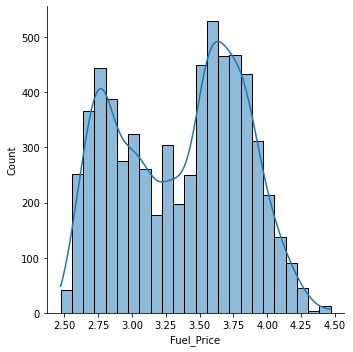

In [33]:
sns.displot(df['Fuel_Price'],kde=True)

This data distribution has two distinct peaks, it is often referred to as a "bimodal" distribution. In a bimodal distribution, there are two modes, or peaks, indicating that the data has two regions of relatively high frequency or probability.

<AxesSubplot:xlabel='Fuel_Price'>

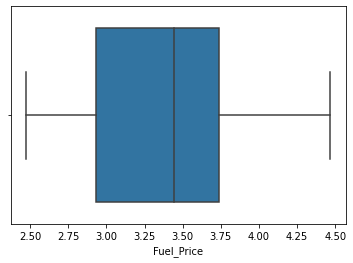

In [34]:
sns.boxplot(df['Fuel_Price'])

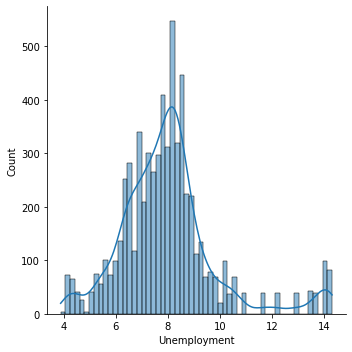

In [35]:
sns.displot(df['Unemployment'],kde=True)

<AxesSubplot:xlabel='Unemployment'>

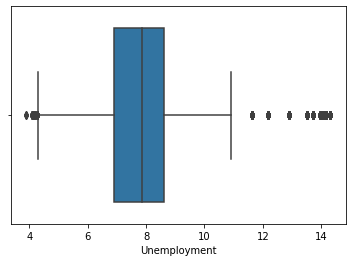

In [36]:
sns.boxplot(df['Unemployment'])

<AxesSubplot:xlabel='CPI', ylabel='Density'>

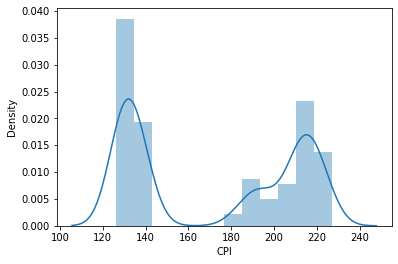

In [37]:
sns.distplot(df['CPI'],kde=True)

The above diagram is bimodal with large CPI value at range(130-140) and at range(180-225). 

<AxesSubplot:xlabel='CPI'>

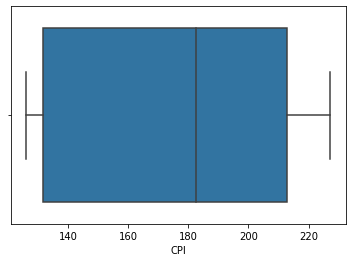

In [38]:
sns.boxplot(df['CPI'])

### Applying Power Transformation on numeric columns 


In [39]:
cols =['Temperature','Fuel_Price','CPI','Unemployment']
df_numeric = df[cols]
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=True)
df_transformed = pd.DataFrame(pt.fit_transform(df_numeric),columns=cols)

pd.DataFrame({'cols':cols, 'box-cox lamda': pt.lambdas_})

for col in cols:
    df[col] = df_transformed[col]
    
    
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,Saturday,May,2010
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,Wednesday,December,2010
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,Thursday,February,2010
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,Thursday,February,2010
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,Sunday,May,2010


The Box-Cox transformation, implemented through the PowerTransformer, is useful for handling skewness and making the distribution more normal

# Data Preprocessing
* Removal of Outliers - Unemployment 
* Encoding - categorical varaible - Target Encoding
 

In [40]:
df.shape

(6435, 10)

In [41]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Unemployment'] >= Q1-1.5*(IQR)]
df = df[df['Unemployment'] <= Q3+1.5*(IQR)]
df.shape


(5922, 10)

In [42]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Temperature'] >= Q1-1.5*(IQR)]

df = df[df['Temperature'] <= Q3+1.5*(IQR)]
df.shape

(5922, 10)

### Ploting boxplots after removing outliers

<AxesSubplot:xlabel='Temperature'>

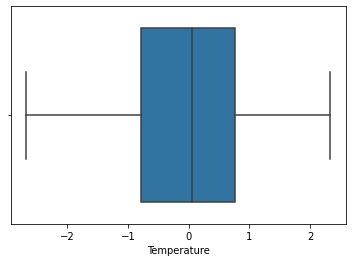

In [43]:
sns.boxplot(df['Temperature'])

<AxesSubplot:xlabel='Unemployment'>

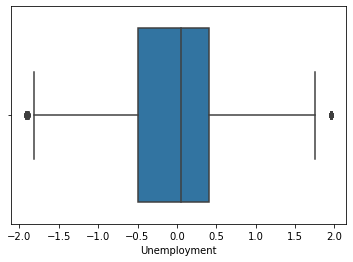

In [44]:
sns.boxplot(df['Unemployment'])

#### **Encoding**


In [45]:
# tranformation of distributions
# how to find multi colinearity and use feature selection

# Data Manipulation
* Encoding - using column transormer 
* Scaling
* Splitting data

In [46]:
# Target guided encoding of day ,month, year column - ranked as per the sales
tge= {'Sunday':5,'Monday':3, 'Tuesday':0, 'Wednesday':4, 'Thursday':6,  'Friday':1,'Saturday':2}
df['Day'] = df['Day'].map(tge)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2,May,2010
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,4,December,2010
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,6,February,2010
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,6,February,2010
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,5,May,2010


In [47]:
yr = {2010:1, 2011:2, 2012:0}
df['Year'] = df['Year'].map(yr)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2,May,1
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,4,December,1
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,6,February,1
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,6,February,1
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,5,May,1


In [48]:
mn = {'January':1,'February':3,'March':4,'April':12,'May':11,'June':6,'July':8,'August':5,'September':7,'October':10,'Novemenber':2,'December':9}
df['Month'] = df['Month'].map(mn)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2,11,1
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,4,9,1
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,6,3,1
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,6,3,1
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,5,11,1


# Feature Selection

Text(0.5, 1.0, 'Correlation Matrix')

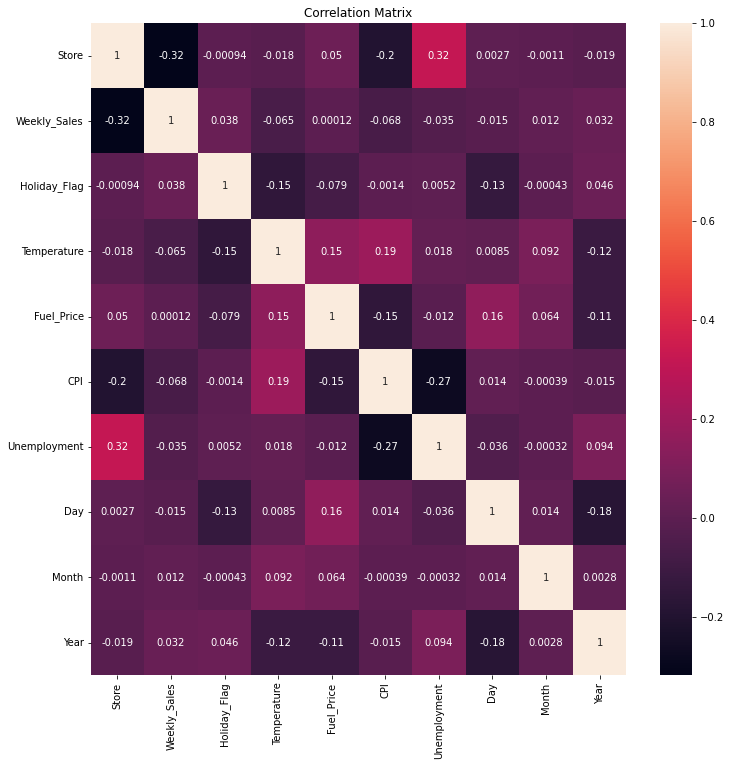

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

There is no strong correlation between features and target variable and also between the features themselves.

In [50]:
X = df.drop(['Weekly_Sales'],axis=1)
y = df['Weekly_Sales']

In [51]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [52]:
print(model.feature_importances_)

[0.62928962 0.00786947 0.02169726 0.02081716 0.18810218 0.1022435
 0.00490788 0.00921053 0.01586241]


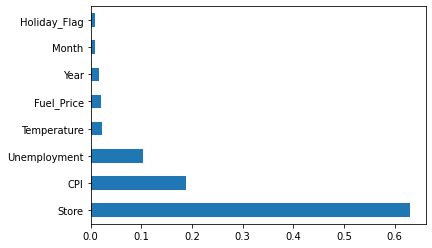

In [53]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

Based on the feature importance diagram, only few features shows correlation with our target variable 'weekly_sales'. So we are building our prediction model based on top 5 features.

In [54]:
cols = ['Temperature', 'Fuel_Price','Unemployment','CPI','Store']
X = df[cols]


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
X_train

,Temperature,Fuel_Price,Unemployment,CPI,Store
229,0.960347,-0.024431,0.043846,1.110719,2
4458,0.809957,-1.440180,0.656820,0.557891,32
711,0.548139,0.552808,-1.639950,1.252888,5
218,1.677026,0.459568,0.043846,1.084295,2
5271,1.202722,0.058634,-0.479520,1.189746,37
...,...,...,...,...,...
4102,-1.140227,0.102443,0.819031,-0.863136,29
5621,-1.959448,-0.507292,-1.756341,-0.989858,40
5739,-0.365102,-1.473323,-0.244404,0.546242,41
5903,-0.017870,-0.511587,0.649993,-1.196665,42


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False),['Store'])],remainder='passthrough')

In [58]:
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [59]:
X_train[0:10]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.96034675, -0.02443115,  0.04384629,  1.11071938],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.

# Predictive Modelling

#### Regression Metrics 
1. MSE
2. MAE
3. R2 SCORE
4. RMSE

In [60]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [61]:
def pred_model(model,X_train,Y_train,X_test,Y_test):
    c = model()
    c.fit(X_train,Y_train)
    y_pred1 = c.predict(X_train)
    y_pred2 = c.predict(X_test)
    
    print(model)
    print(f'MSE: {mean_squared_error(Y_test,y_pred2)}')
    print(f'MAE: {mean_absolute_error(Y_test,y_pred2)}')
    print(f'R2 : {r2_score(Y_test,y_pred2)}')
    
    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Y_train, y_pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Y_train-y_pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Y_train, y_pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Y_train, y_pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Y_test, y_pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Y_test-y_pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Y_test, y_pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Y_test, y_pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Y_test - y_pred2))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Y_test,y_pred2)
    plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 23149188781.67693
MAE: 89841.38721530203
R2 : 0.9257816556000087


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9171656308851185
Residual Sum of Squares (RSS) on Training set  ---> 112857341975882.1
Mean Squared Error (MSE) on Training set       ---> 27227344264.386513
Root Mean Squared Error (RMSE) on Training set ---> 165007.10367855837

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9257816556000087
Residual Sum of Squares (RSS) on Training set  ---> 41136108465039.91
Mean Squared Error (MSE) on Training set       ---> 23149188781.67693
Root Mean Squared Error (RMSE) on Training set ---> 152148.5746948585

--------------------Residual Plots--------------------


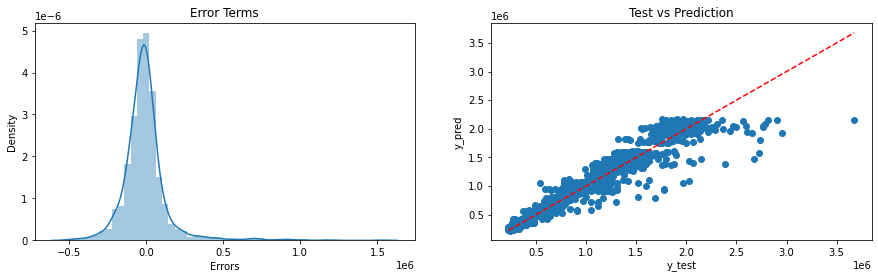

In [62]:
pred_model(LinearRegression,X_train,y_train,X_test,y_test)

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
MSE: 23122324209.13959
MAE: 89751.31680947631
R2 : 0.925867785792973


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9171556433928132
Residual Sum of Squares (RSS) on Training set  ---> 112870949393269.58
Mean Squared Error (MSE) on Training set       ---> 27230627115.384697
Root Mean Squared Error (RMSE) on Training set ---> 165017.0509837838

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.925867785792973
Residual Sum of Squares (RSS) on Training set  ---> 41088370119641.055
Mean Squared Error (MSE) on Training set       ---> 23122324209.13959
Root Mean Squared Error (RMSE) on Training set ---> 152060.2650567846

--------------------Residual Plots--------------------


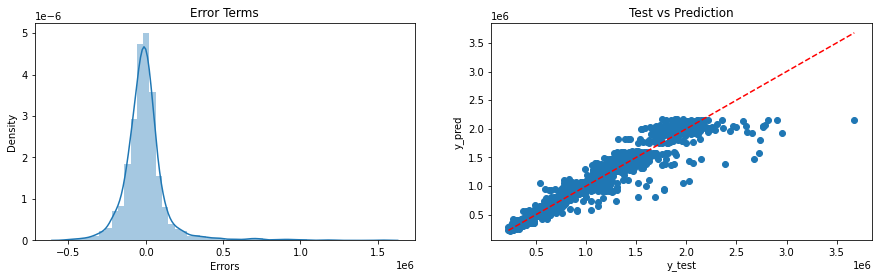

In [63]:
pred_model(Lasso,X_train,y_train,X_test,y_test)

<class 'sklearn.linear_model._ridge.Ridge'>
MSE: 23037310779.08749
MAE: 89432.51675224993
R2 : 0.9261403463604183


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9168772262182812
Residual Sum of Squares (RSS) on Training set  ---> 113250277715726.19
Mean Squared Error (MSE) on Training set       ---> 27322141789.07749
Root Mean Squared Error (RMSE) on Training set ---> 165294.10693995564

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9261403463604183
Residual Sum of Squares (RSS) on Training set  ---> 40937301254438.47
Mean Squared Error (MSE) on Training set       ---> 23037310779.08749
Root Mean Squared Error (RMSE) on Training set ---> 151780.46903039762

--------------------Residual Plots--------------------


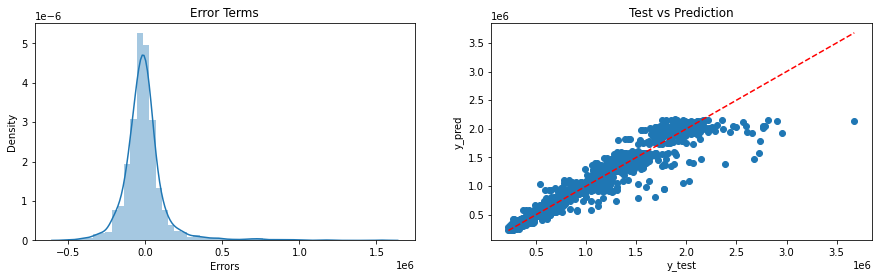

In [64]:
pred_model(Ridge,X_train,y_train,X_test,y_test)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 21126619760.037746
MAE: 76774.5993971863
R2 : 0.9322661905716871


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9893081621588907
Residual Sum of Squares (RSS) on Training set  ---> 14567050035852.457
Mean Squared Error (MSE) on Training set       ---> 3514366715.525321
Root Mean Squared Error (RMSE) on Training set ---> 59282.09439219671

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9322661905716871
Residual Sum of Squares (RSS) on Training set  ---> 37542003313587.08
Mean Squared Error (MSE) on Training set       ---> 21126619760.037746
Root Mean Squared Error (RMSE) on Training set ---> 145349.99057460495

--------------------Residual Plots--------------------


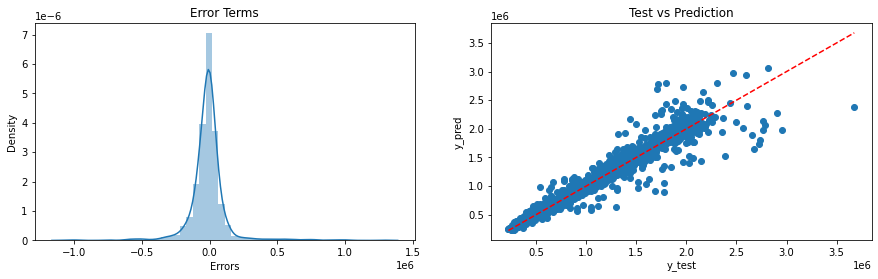

In [65]:
pred_model(RandomForestRegressor,X_train,y_train,X_test,y_test)

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
MSE: 284667648690.0172
MAE: 451474.77355700923
R2 : 0.08733036871104782


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.0895529017619755
Residual Sum of Squares (RSS) on Training set  ---> 1240434865560394.5
Mean Squared Error (MSE) on Training set       ---> 299260522451.24115
Root Mean Squared Error (RMSE) on Training set ---> 547047.0934492213

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.08733036871104782
Residual Sum of Squares (RSS) on Training set  ---> 505854411722160.56
Mean Squared Error (MSE) on Training set       ---> 284667648690.0172
Root Mean Squared Error (RMSE) on Training set ---> 533542.5462791297

--------------------Residual Plots--------------------


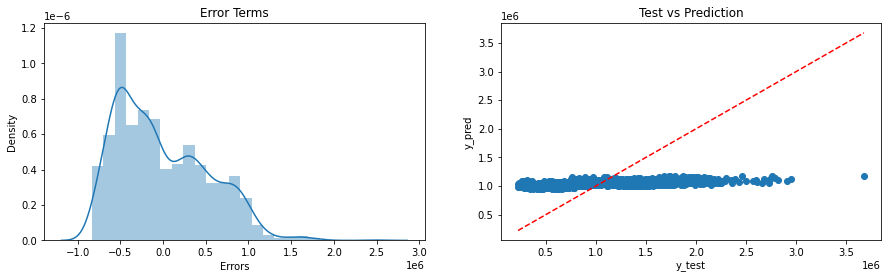

In [66]:
pred_model(ElasticNet,X_train,y_train,X_test,y_test)

# Building Model Object for deployment

In [67]:
def pred_model(model,X_train,Y_train,X_test,Y_test):
    c = model()
    c.fit(X_train,Y_train)
    y_pred = c.predict(X_test)
    return c

In [68]:
rf_random = pred_model(RandomForestRegressor,X_train,y_train,X_test,y_test)

In [ ]:
try:
    with open('random_forest_reg_model.pkl', 'wb') as file:
        pickle.dump(rf_random, file)
except Exception as e:
    print(f"Error: {e}")

In [69]:
# # open a file, where you ant to store the data
# file = open('random_forest_reg_model.pkl', 'wb')

# # dump information to that file
# pickle.dump(rf_random, file)

In [78]:
model = pred_model(LinearRegression,X_train,y_train,X_test,y_test)

In [79]:
try:
    with open('Linear_regression_model.pkl', 'wb') as file:
        pickle.dump(model, file)
except Exception as e:
    print(f"Error: {e}")

In [71]:
# # open a file, where you ant to store the data
# file1 = open('Linear_regression_model.pkl', 'wb')

# # dump information to that file
# pickle.dump(model, file1)

In [80]:
model3= pred_model(Lasso,X_train,y_train,X_test,y_test)

In [81]:
try:
    with open('Lasso_regression_model.pkl', 'wb') as file:
        pickle.dump(model3, file)
except Exception as e:
    print(f"Error: {e}")

In [73]:
# # open a file, where you ant to store the data
# file2 = open('Lasso_regression_model.pkl', 'wb')

# # dump information to that file
# pickle.dump(model3, file2)

In [82]:
model4 = pred_model(ElasticNet,X_train,y_train,X_test,y_test)

In [83]:
try:
    with open('elasticnet_model.pkl', 'wb') as file:
        pickle.dump(model4, file)
except Exception as e:
    print(f"Error: {e}")

In [75]:
# # open a file, where you ant to store the data
# file3 = open('elasticnet_model.pkl', 'wb')

# # dump information to that file
# pickle.dump(model4, file3)

In [84]:
model5 = pred_model(Ridge,X_train,y_train,X_test,y_test)

In [85]:
try:
    with open('Ridge_regression_model.pkl', 'wb') as file:
        pickle.dump(model5, file)
except Exception as e:
    print(f"Error: {e}")

In [77]:
# open a file, where you ant to store the data
file4 = open('Ridge_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model5, file4)